In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [136]:
from fastai.conv_learner import *
from torchvision import datasets, transforms, utils
from pathlib import Path

import warnings

In [3]:
PATH = Path('fastai/data/cifar10')
PATH_TRN = Path('fastai/data/cifar10/train/')

In [44]:
list(PATH_TRN.iterdir())

[PosixPath('fastai/data/cifar10/train/automobile'),
 PosixPath('fastai/data/cifar10/train/airplane'),
 PosixPath('fastai/data/cifar10/train/cat'),
 PosixPath('fastai/data/cifar10/train/deer'),
 PosixPath('fastai/data/cifar10/train/ship'),
 PosixPath('fastai/data/cifar10/train/horse'),
 PosixPath('fastai/data/cifar10/train/truck'),
 PosixPath('fastai/data/cifar10/train/bird'),
 PosixPath('fastai/data/cifar10/train/dog'),
 PosixPath('fastai/data/cifar10/train/frog')]

In [45]:
# Constants
classes = ('automobile', 'airplane', 'cat', 'deer', 'ship', 'horse', 'truck', 'bird', 'dog', 'frog')
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

In [46]:
cls2idx = {c:i for i,c in enumerate(classes)}
idx2cls = {i:c for i,c in enumerate(classes)}


In [49]:
cls2idx['frog']

9

In [48]:
idx2cls[3]

'deer'

In [78]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

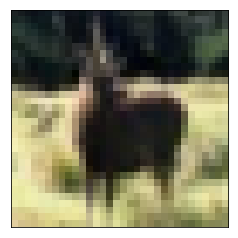

In [80]:
show_img(get_img(4))

In [152]:
class ResScale(DataLoader):
    """Scale down an image to a particular resolution

    Args:
        res_list (list): The list of resolutions to consider for training.
        cls_list (list): The list of classes to consider for training.
        fix_res (Boolean): The control parameter for resolution list.
        fix_cls (Boolean): The control parameter for class list.
    """
    def __init__(self,res_list, cls_list, fix_res, fix_cls):
        self.res_list = res_list
        self.cls_list = cls_list
        self.fix_res = fix_res
        self.fix_cls = fix_cls

    def __call__(self):

        new_img = []

        if (len(self.res_list) > 0) and (self.fix_res == False) and (len(self.cls_list) > 0) and (self.fix_cls == False):
            
            print('You have specified a resolution list and class list but not added a fix parameter for both. The output will include only the first element of both lists')
            
            """
                Definition: If there are k resolutions with n class; this should return a single image
                for the first resolution for the first class in respective lists
                
                Example: 2 resolutions [7,20] and 2 class (5 images each); 
                         output: 1 image of class1 of 7X7
            """
            
            img = get_img(self.cls_list[0])
            m = nn.AdaptiveAvgPool2d(self.res_list[0])
            new_img.append(m(T(img)))
            return new_img
            
                
        elif (len(self.res_list) > 0) and (self.fix_res == True) and (len(self.cls_list) > 0) and (self.fix_cls == False):
            
            print('You have specified a resolution list and class list but not added a fix parameter for classes. The output will include only the first element from class lists')
            

            """
                Definition: If there are k resolutions with n class; this should return images
                for each resolution for the first class in respective lists
                
                Example: 2 resolutions [7,20] and 2 class (5 images each); 
                         output: 5 images of class1 of 7X7, 5 images of class1 of 20x20
            """
             
            for r in self.res_list:
                    img = get_img(self.cls_list[0])
                    m = nn.AdaptiveAvgPool2d(r)
                    new_img.append(m(T(img)))
            
            return new_img 
  
            
            
        elif (len(self.res_list) > 0) and (self.fix_res == False) and (len(self.cls_list) > 0) and (self.fix_cls == True):
            
            print('You have specified a resolution list and class list but not added a fix parameter for resolution. The output will include only the first element from resolution lists')
            

            """
                Definition: If there are k resolutions and n classes; this should return images
                for first resolution for every class
                
                Example: 2 resolutions [7,20] and 2 class (5 images each); 
                         output: 5 images of class1 of 7X7 , 5 images of class2 of 7X7
            """
            
            for c in self.cls_list:
                    img = get_img(c)
                    m = nn.AdaptiveAvgPool2d(self.res_list[0])
                    new_img.append(m(T(img)))
            
            return new_img   
            
            
            
        elif (len(self.res_list) > 0) and (self.fix_res == True) and (len(self.cls_list) > 0) and (self.fix_cls == True):

            
            """
                Definition: If there are k resolutions and n classes; this should return images sequentially
                for every class until epoch for each resolution sequentially
                
                Example: 2 resolutions [7,20] and 2 class (5 images each); 
                         output: 5 images of 7X7 for class 1, 5 images of 7x7 for class 2,
                                 5 images of 20X20 for class 1, 5 images of 20x20 for class 2
            """

            for r in self.res_list:
                for c in self.cls_list:
                    img = get_img(c)
                    m = nn.AdaptiveAvgPool2d(r)
                    new_img.append(m(T(img)))
            
            return new_img
                
    def get_img(cls):
        im = open_image(str(random.choice(list((PATH_TRN/idx2cls[3]).iterdir()))))
        return im

In [84]:
res_list = [7,11,14,20,28]

In [85]:
cls_list = [0,4,3,5]

In [153]:
res= ResScale(cls_list=cls_list, res_list=res_list, fix_cls=False, fix_res=True)


Usage:

    res[X][Y]:  The output will have appended tensors in X and a batch of 32/bs in Y
                X will depend upon the choice of fix parameter and can be a max of len(res_list)*len(cls_list)
